# Multi Layer Perceptron

###Aiswarya EV______________________________________________________________________________________4/11/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
y=df['Outcome']
print(y)
df=df.drop(['Outcome'],axis=1)
x= df
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70      

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25,random_state=0)

In [15]:
print(x_train.shape)

(576, 8)


In [16]:
print(x_test.shape)

(192, 8)


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
st_x=MinMaxScaler()

In [20]:
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_test)

[[0.07692308 1.         0.66666667 ... 0.81096408 0.72169548 0.02272727]
 [0.15384615 0.53768844 0.64912281 ... 0.63516068 0.16954824 0.04545455]
 [0.30769231 0.38190955 0.54385965 ... 0.64272212 0.16229782 0.09090909]
 ...
 [0.07692308 0.54773869 0.52631579 ... 0.48015123 0.47239264 0.        ]
 [0.23076923 0.64321608 0.68421053 ... 0.39886578 0.09369771 0.77272727]
 [0.38461538 0.44221106 0.68421053 ... 0.52173913 0.08812047 0.36363636]]


In [25]:
classifier = MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
classifier.fit(x_train,y_train)
x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

In [29]:
print(y_test.shape)
print(y_pred.shape)

(192,)
(192,)


In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[100  30]
 [ 14  48]]


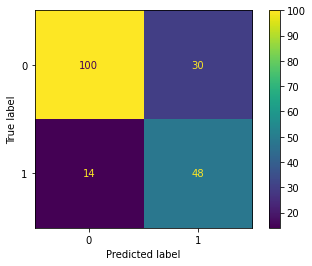

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label=0)))

Accuracy score: 0.7708333333333334
Precision score: 0.8771929824561403
Recall score: 0.7692307692307693
F1 score: 0.819672131147541


In [32]:
classifier.coefs_
##classifier.intercepts_

[array([[-3.78389441e-05, -1.48773521e-01,  1.04674344e-01,
         -1.04935122e-01, -2.99882290e-01, -3.93609814e-01,
         -2.28077829e-01,  3.67296553e-01],
        [ 9.96125868e-03, -2.56640359e-01, -3.09875301e-01,
         -5.04773304e-01, -1.92748762e-01, -8.31762936e-02,
          5.55781636e-01,  1.72030272e-01],
        [-2.01452046e-02,  3.93862201e-01,  3.63159551e-01,
         -1.40234636e-01,  1.13389599e-01,  1.88334899e-01,
          3.44996304e-01,  3.03722050e-01],
        [ 5.07920901e-07, -5.70131604e-03,  2.16905318e-01,
         -4.23956714e-01,  2.63165756e-01, -8.98731401e-01,
         -9.37250592e-02, -4.60056826e-01],
        [ 6.65076916e-25,  4.23939455e-01,  5.64474177e-01,
         -3.44169866e-01, -7.34109917e-02, -3.63067964e-02,
          5.62250250e-01, -3.83490854e-01],
        [-2.27768652e-02, -4.20673116e-01, -3.64540077e-01,
          3.99287481e-01, -8.04616987e-02,  2.71102380e-01,
          7.47420527e-01, -1.09429241e+00],
        [-9.8081

In [33]:
classifier.intercepts_

[array([-0.31236649,  0.54688598,  0.2788939 ,  0.56783814,  0.24271923,
         0.50895853, -0.05189872, -0.16068182]),
 array([-0.19917048,  0.17713903,  0.25774697,  0.40233587,  0.45253042,
        -0.51788796,  0.67470003,  0.30239471]),
 array([ 0.29568268,  0.66821037,  0.1193819 ,  0.29473809,  0.65290523,
         0.29831843, -0.01512456,  0.52732765]),
 array([0.39373492])]